# Electromagnetic fields of a moving point charge

In this project, we are going to use the `PyCharge` python package (<https://pycharge.readthedocs.io/en/latest/>) to simulate the electromagnetic fields of moving charges. Before working on the problems below, first take a look at the documentation of `PyCharge`, particularly the "Background Information" on [Point Charges](https://pycharge.readthedocs.io/en/latest/background_information/point_charges/).

In what follows, I will first show you an example, and you will work out the rest of the problems with your groupmates.

## Example: a point charge moving with constant velocity

In this example, I will show you how to use `PyCharge` to simulate the electric field of a charge moving with constant velocity. We will assume that the charge is moving along the x direction with a speed $v=0.9c$.

Firstly, you need to install `PyCharge` by running the following cell:

In [1]:
!pip install pycharge

Importing the necessary modules:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycharge as pc
import matplotlib

Now we initialize the charge and the grid over which we would like to calculate the electric field. Note that all the units are in SI. We look at a 2D grid going from -5 m to 5 m in the x direction, and -5 m to 5 m in the z direction. The resolution is 1000x1000. The time we would like to simulate goes from 0 to $3.33\times10^{-8}$ s, and we will have 50 frames to make an animation.

In [6]:
c = 3e8
lim = 5.0
grid_size = 1000
x0=np.linspace(-lim, lim, grid_size)
x, y, z = np.meshgrid(x0, 0, x0, indexing='ij')
v=0.9*c
tmax=9.0/v
print(tmax)
n_frame=50
dt=tmax/n_frame

charge = pc.LinearVelocityCharge(speed=v,init_pos=-0.9*lim)
simulation = pc.Simulation(charge)


3.3333333333333334e-08


The following code makes a plot at t=0. We use streamplot to show the direction of the electric field (note that the density of the stream plot is random and is not related to the magnitude of the electric field), and the color shows the magnetude of the electric field in log scale. The location of the charge is shown by the red dot.

/opt/homebrew/lib/python3.11/site-packages/pycharge/simulation.py:148: RuntimeWarning: RMS of 2.51139e-20 reached
  tr = optimize.newton(charge.solve_time, initial_guess,


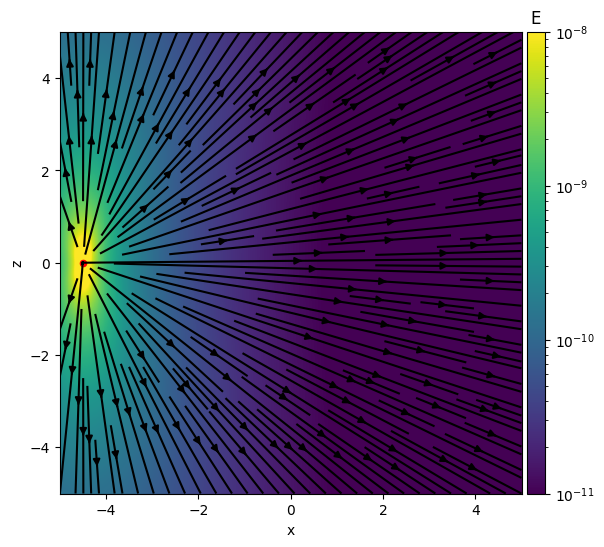

In [7]:
i=0
t=i*dt
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
Ex = E_total[0][:, 0, :]
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)

fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
# step=40
# Q = ax.quiver(x0[::step], x0[::step],
#               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
pos = ax.scatter(charge.xpos(t), 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.show()

The following code makes an animation.

In [8]:
import sys
import os
plotdir='./plot'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

In [ ]:
for i in range(0,n_frame+1):
    t=i*dt
    E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
    Ex = E_total[0][:, 0, :]
    Ey = E_total[1][:, 0, :]
    Ez = E_total[2][:, 0, :]
    Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)
    fig=plt.figure(figsize=(7,6))
    ax=fig.add_subplot(111)
    vmin=1e-11
    vmax=1e-8
    im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
    stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
    pos = ax.scatter(charge.xpos(t), 0, s=20, c='red', marker='o')
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("z")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('E')
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

In [ ]:
!ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p const_v_0.9c.mp4
!rm plot/slice*

Compare your results with Example 10.4 in the textbook. Does this make sense to you?

## Problem 1: A charge with constant acceleration

Consider a charge initially at rest at the origin. At t=0, the charge starts to move along the x direction with a constant acceleration $a=5\times10^{15}$ m/s. Plot out the electric field of the charge on the xz plane at different times and make an animation. What do you find?

__Hint__: you can use the [`LinearAcceleratingCharge`](https://pycharge.readthedocs.io/en/latest/api_reference/charges-reference/#pycharge.charges.LinearAcceleratingCharge) class to do this. You do not need to give a `stop_t`; the charge will continue to accelerate until it reaches 0.999c. You may consider a domain with x going from -5 m to 5 m, and z from -5 m to 5 m. The time range to consider can be from $t=0$ to $t=6\times10^{-8}$ s.

## Problem 2: A charge with a burst of sudden acceleration

A charge is initially at rest at the origin. At t=0 the charge starts to move along the x direction with constant acceleration. The acceleration lasts for 1 ns and the charge reaches a speed of 0.5c. Afterwards the charge moves with the constant speed of 0.5c. Plot out the electric field of the charge on the xz plane at different times and make an animation. Is your finding consistent with your expectation?

## Problem 3: A charge coming to a sudden stop

A charge is initially moving with constant speed v=0.5c along the x direction. At time $t=0$, the charge starts to decelerate at a constant rate. After 1 ns, the charge completely stops. Plot out the electric field of the charge on the xz plane at different times and make an animation. Is your finding consistent with your expectation?

## Problem 4: An oscillating charge

A charge is oscillating along the z direction, with an amplitude of 2 mn and a period of $T=1.0\times10^{-16}$ s. Plot out the electric field of the charge on the xz plane at different times and make an animation. Is your finding consistent with your expectation?